In [38]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [39]:
sizes = list(range(10,210,10))
reps = 10000

In [40]:
def sim_r_squared(n):
    x = np.random.normal(0,1,n)
    y = 1 + x + np.random.normal(0,1,n)
    data = pd.DataFrame({'x': x, 'y': y})
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

In [41]:
r_squared_q95 = np.zeros(len(sizes))
r_squared_q05 = np.zeros(len(sizes))
r_squared_mean = np.zeros(len(sizes))

In [42]:
for i in range(0,len(sizes)):
    print(sizes[i])
    result=list(map(lambda x: sim_r_squared(sizes[i]), range(reps)))
    r_squared_mean[i] = np.mean(result)
    r_squared_q95[i] = np.quantile(result, 0.95)
    r_squared_q05[i] = np.quantile(result, 0.05)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


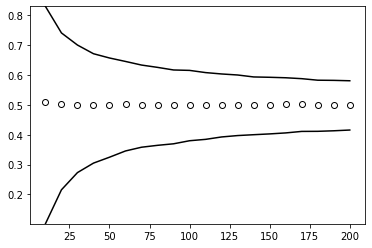

In [43]:
plt.ylim(min(r_squared_q05), max(r_squared_q95))
plt.plot(sizes, r_squared_mean, 'ko', mfc='none')
plt.plot(sizes, r_squared_q05, 'k-')
plt.plot(sizes, r_squared_q95, 'k-')